## Тема “Обучение без учителя”


**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.Создайте датафреймы X и y из этих
 данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [70]:
data = load_boston()
data

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [73]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [74]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [75]:
len(y)

506

В данных нет пропусков и выбросов

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Стандартизируем наши данные

In [77]:
scaler = StandardScaler()

In [78]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Применим tsne для построения диаграммы рассеяния

In [79]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [80]:
x_train_tsne = tsne.fit_transform(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [81]:
x_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

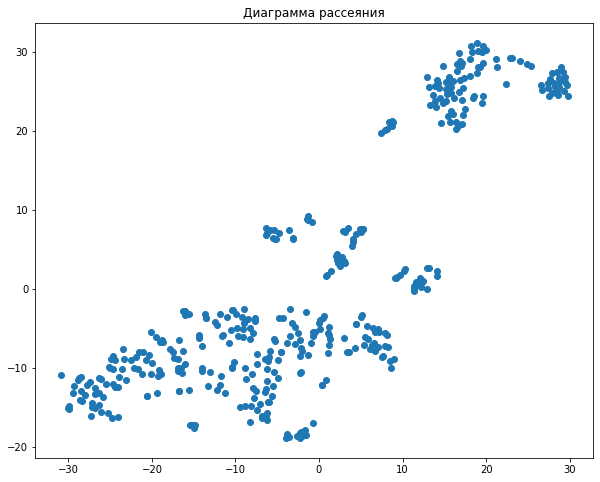

In [82]:
plt.figure(figsize=(10, 8))

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.title('Диаграмма рассеяния')

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [83]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [84]:
train_cluster = kmeans.fit_predict(x_train)

In [85]:
pd.value_counts(train_cluster)

2    191
1    127
0     86
dtype: int64

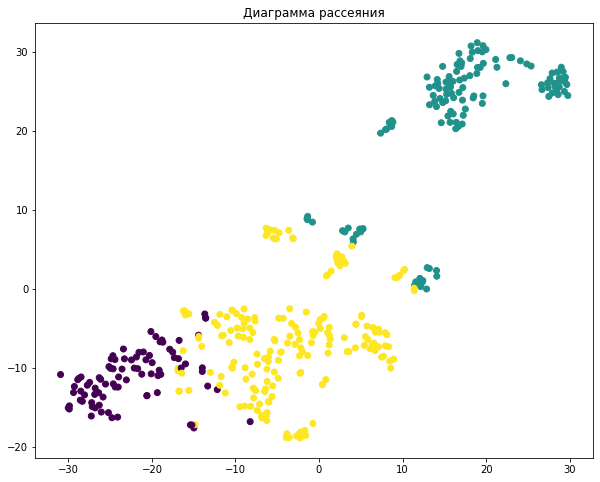

In [86]:
plt.figure(figsize=(10, 8))

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_cluster)
plt.title('Диаграмма рассеяния')

plt.show()

In [87]:
x_train = scaler.inverse_transform(x_train)
x_train = pd.DataFrame(x_train, columns=data.feature_names)

In [88]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,1.776357e-15,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,1.776357e-15,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,3.500000e+01,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
3,7.05042,1.776357e-15,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
4,0.72580,1.776357e-15,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [89]:
y_train[train_cluster==0].mean()

27.78837209302326

In [90]:
y_train[train_cluster==1].mean()

16.165354330708663

In [91]:
y_train[train_cluster==2].mean()

24.958115183246072

In [92]:
x_train.loc[train_cluster==0, 'CRIM'].mean()

0.07356558139534881

In [93]:
x_train.loc[train_cluster==1, 'CRIM'].mean()

10.797028425196851

In [94]:
x_train.loc[train_cluster==2, 'CRIM'].mean()

0.42166020942408383

**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [95]:
test_cluster = kmeans.predict(x_test)
test_cluster

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2], dtype=int32)

In [99]:
x_test = scaler.inverse_transform(x_test)
x_test = pd.DataFrame(x_test, columns=data.feature_names)

In [96]:
y_test[test_cluster==0].mean()

31.35

In [97]:
y_test[test_cluster==1].mean()

16.43714285714286

In [98]:
y_test[test_cluster==2].mean()

21.860784313725492

In [100]:
x_test.loc[test_cluster==0, 'CRIM'].mean()

0.06206000000000003

In [101]:
x_test.loc[test_cluster==1, 'CRIM'].mean()

10.165531142857143

In [102]:
x_test.loc[test_cluster==2, 'CRIM'].mean()

0.2660788235294117